# <font color=purple> Bike sharing Assignment <font>
<p>PROBLEM STATEMENT - A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Table of contents 
1. Data Understanding 
2. Data Cleaning 
3. Data Manipulation 
4. Data Analysis
5. Data Transformation
6. Model building and evaluation
5. Recommendations

## <font color=brown>1. Data Understanding<font>
### <font color=#0f3fd1 >1.1 Importing required libraries<font>

In [1]:
import numpy as np  #Scientific Computing Libraries
import pandas as pd  #Data Cleaning and Analysis Libraries 
import matplotlib.pyplot as plt #Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries

import sklearn #Scikit Library for evaluating requirement specific parameters and performing preprocessing steps
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm   #StatsModel Library for displaying detailed information about model
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings   #ignore warnings from displaying on UI
warnings.filterwarnings('ignore')
%matplotlib inline

### <font color=#0f3fd1 >1.2 Load the Data<font>

In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### <font color=#0f3fd1 >1.3 Data overview <font>

In [3]:
#Basic Data Overview
print ("Number of Rows : " ,df.shape[0])
print ("Number of Columns : " ,df.shape[1])
print ("Features : \n" ,df.columns.tolist())
print ("Data Types of column:\n",df.dtypes.value_counts())

Number of Rows :  730
Number of Columns :  16
Features : 
 ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Data Types of column:
 int64      11
float64     4
object      1
dtype: int64


In [4]:
print ("Number of Columns having all Null values:", len(df.columns[df.isnull().all()].tolist()))
print ("\nNumber of Missing values Count: ", df.isnull().sum().values.sum())
print ("\nSingle valued columns: \n",df.columns[df.nunique() == 1].tolist())

Number of Columns having all Null values: 0

Number of Missing values Count:  0

Single valued columns: 
 []


## <font color=brown>2. Data Cleaning <font>


Among 16 columns we need to identify the column required for analysis <br>
 
-  instant: dropping instant column as it is merely a index column which has no significance for our target
-  dteday: dteday is not useful as month and weekday are covering it
-  casual: Removing casual and registered as cnt is sum of these
-  registered

In [5]:
#Revoming unnecassary features
Variables = ['instant','dteday','casual','registered']

df.drop(Variables, axis = 1, inplace=True)

In [6]:
#Inspecting data after dropping
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
#Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## <font color=brown>3. Data Manipulation<font>
### <font color=#0f3fd1 >3.1 Data Standardization<font>
    
From the datatable below we can dereive the following insights
-  "season" column is described as numeric, changing into categorical
-  "weathersit" column is described as numeric, changing into categorical
-  "mnth" column is described as numeric, changing into categorical
-  "weekday" column is described as numeric, changing into categorical

In [8]:
#Standardizing numeric data to categorical data
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### <font color=#0f3fd1 >3.2 Data Format<font>
From the above table we can segregate continious numeric values and categorical values. The columns having less number of unique values are considered as Categorical values and the columns have discrete values are considered as Continious numeric values 

In [9]:
ContinuousNumericalVariables = ['temp', 'atemp', 'hum', 'windspeed','cnt']
CategoricalVariables = ['yr','mnth','holiday','weekday','workingday','weathersit']

In [10]:
#Check the Data Type of Continuous Numerical Variables in order to perform numerical analysis.
for x in ContinuousNumericalVariables:
    print(x, df[x].dtype)

temp float64
atemp float64
hum float64
windspeed float64
cnt int64


### <font color=#0f3fd1 >3.2 Outliers <font>

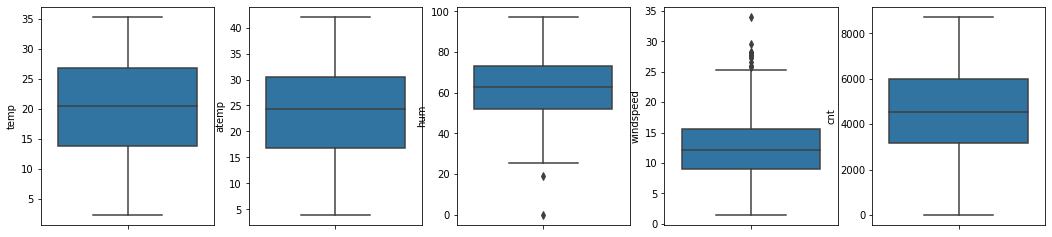

In [11]:
#Plots show that features outliers can be neglected as they're negligible 
plt.figure(figsize=(18,4))

i = 1
for col in ContinuousNumericalVariables:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=df)
    i+=1

## <font color=brown>4. Data Analysis<font>
### <font color=#0f3fd1 >4.1 Univariant Analysis and Bivariant Analysis<font>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

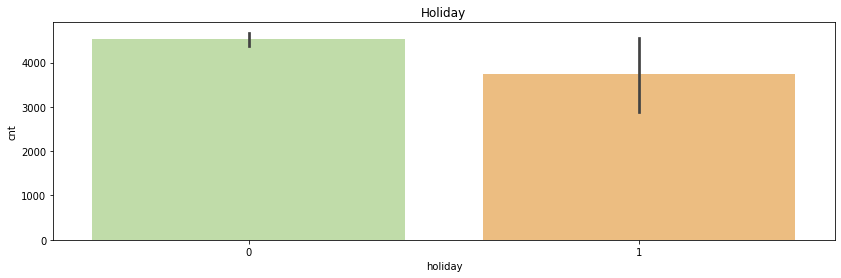

In [12]:
#Observation 
#Holiday is a Categorical Nomimal Variable. But there are only 2 values, "Yes" or "No" mapped to "1" & "0" respectively.
#We see that, Ride Count has increases comparatively on holiday as compared non holiday. This can also be decisive factor for predicting target

plt.figure(figsize=(14,4))
plt.title("Holiday")
sns.barplot(x = 'holiday', y = 'cnt', data = df, palette='Spectral_r')
plt.plot


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

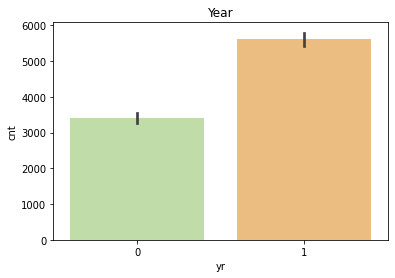

In [13]:
#Observation 
#Year column is varied between 0 and 1 with 0 corresponding to 2018 & 1 corresponding to 2019.
#We see that, Ride Count has increases comparatively in 2019 as compared to 2018. This can also 
#be decisive factor for predicting target
plt.title("Year")
sns.barplot(x = 'yr', y = 'cnt',data = df, palette='Spectral_r')
plt.plot

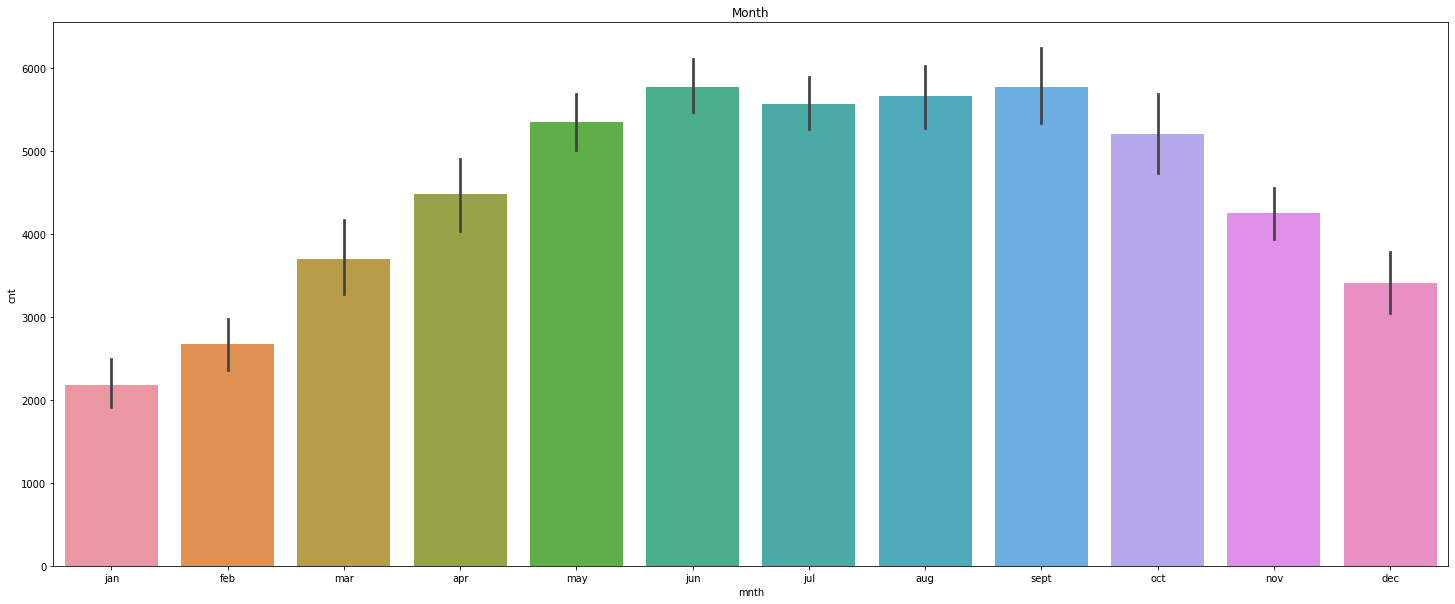

In [14]:
#Observation 
#We see that, Ride Count has higher in the month of june
plt.figure(figsize=(25,10))
plt.title("Month")
sns.barplot(x = 'mnth', y='cnt', data = df)
plt.show()

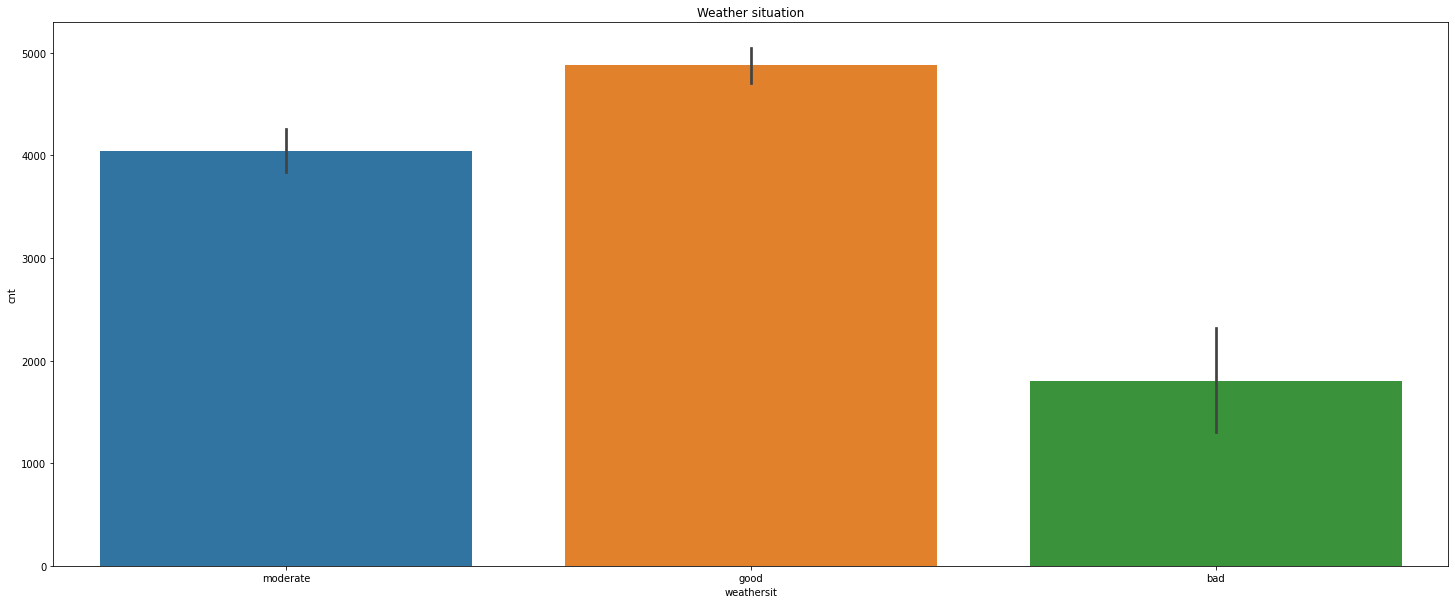

In [15]:
#Observation 
#We see that, Ride Count has higher in good weather
plt.figure(figsize=(25,10))
plt.title("Weather situation")
sns.barplot(x = 'weathersit', y='cnt', data = df)
plt.show()

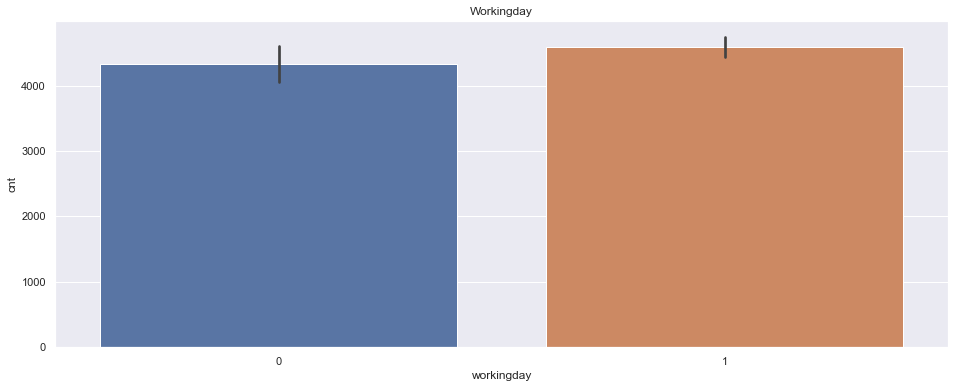

In [16]:
#Observation 
#We see that, Ride Count has higher in during working days
sns.set(rc={'figure.figsize':(16,6)})
plt.title("Workingday")
sns.barplot(x = 'workingday', y='cnt', data = df)
plt.show()

<Figure size 1080x2160 with 0 Axes>

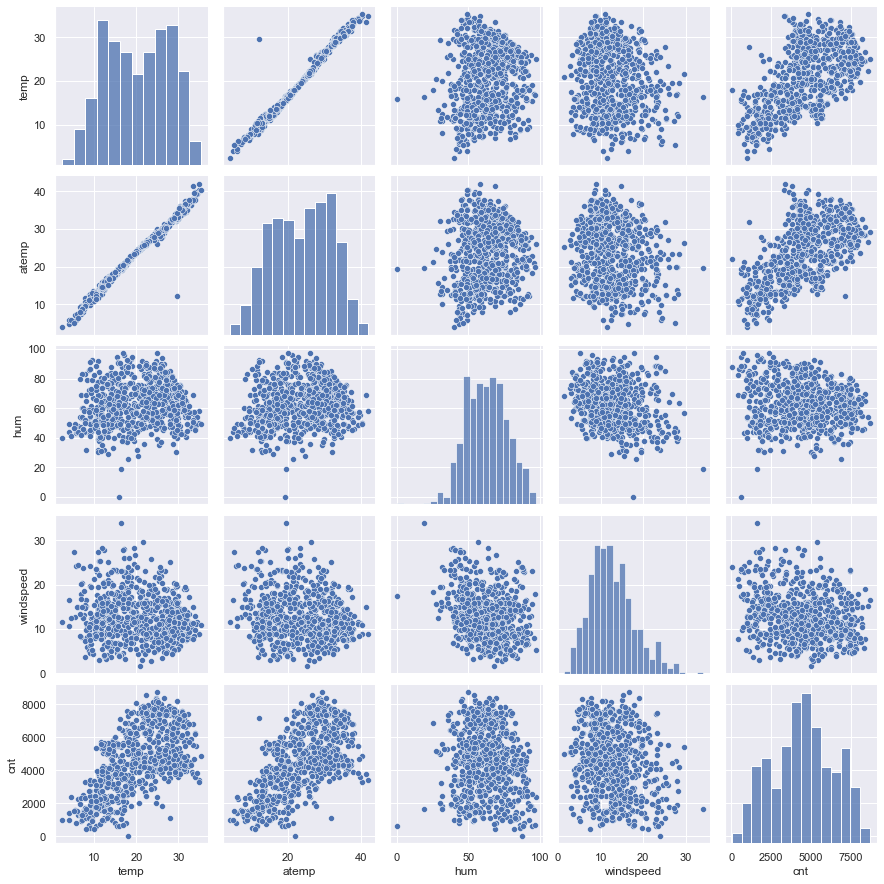

In [17]:
#Pairplot for continious numerical feature to get an overal gist of the entire data set.
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=ContinuousNumericalVariables)
plt.show()

<Figure size 1080x2160 with 0 Axes>

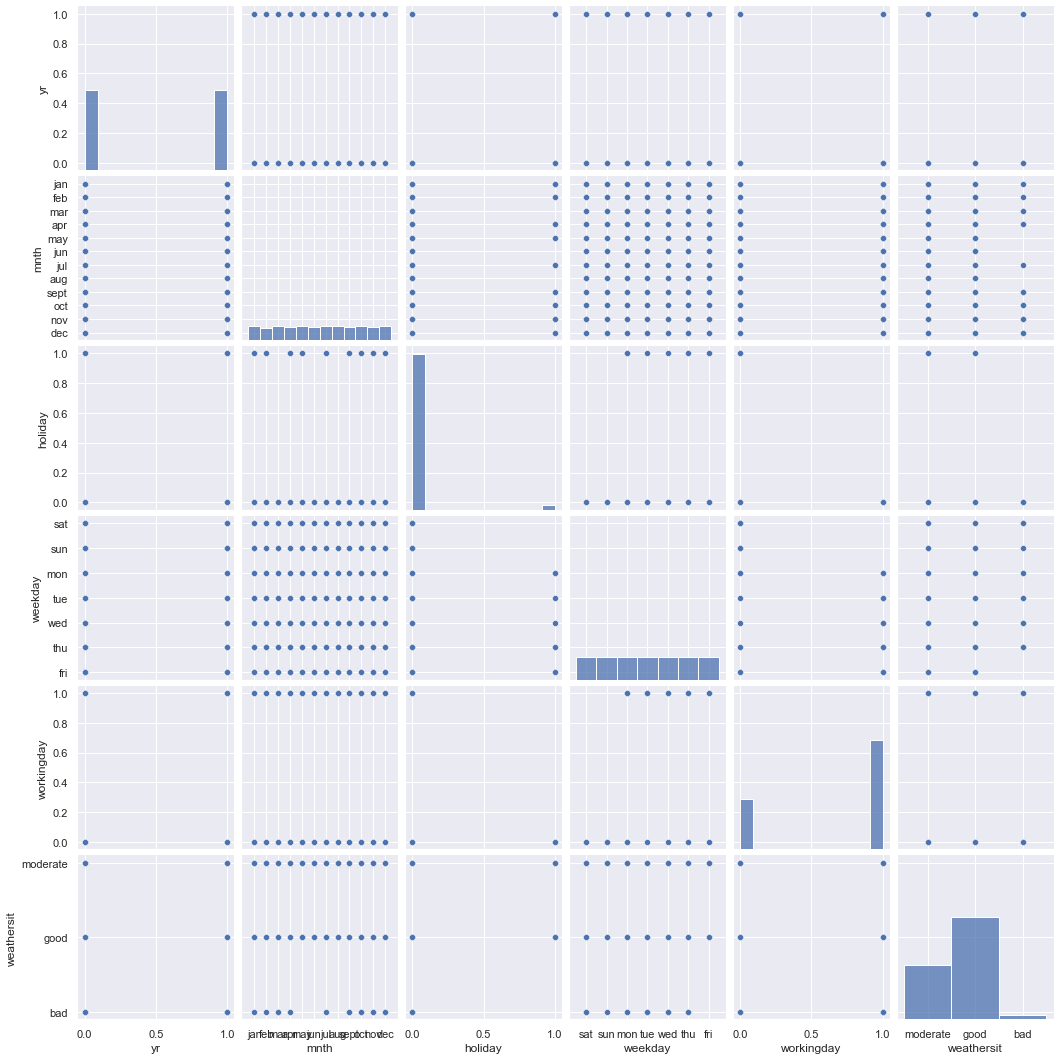

In [18]:
#Pairplot for Categorical to get an overal gist of the entire data set.
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=CategoricalVariables)
plt.show()

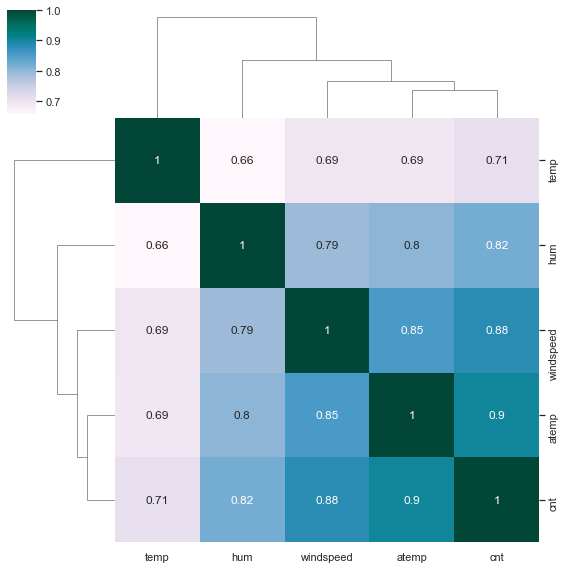

In [19]:
# Observation 
# hum, windspeed temp and count are strongly correlated.

sns.clustermap(data=df[ContinuousNumericalVariables].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1), 
               cmap='PuBuGn', figsize=(8,8), annot=True)
plt.show()

## <font color=brown>5. Data Transformation<font>

<p>Following Columns are Categorical Nominal Variables which needs to encoded using One Hot Encoder Method (i.e. Creating Dummy Variables):<br>
-  Month
-  Season
-  Weekday
-  Weather Situation

In [20]:
dummy_variables = ['mnth', 'season', 'weekday', 'weathersit']
status = pd.get_dummies(df[dummy_variables], drop_first=True)
status.head(10)

,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,...,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [21]:
#Concatenating the dummy variables column and droping the original columns
df = pd.concat([df, status], axis=1)
df = df.drop(columns=dummy_variables)


In [22]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,1,0


## <font color=brown>6. Model building and evaluation <font>
### <font color=#0f3fd1 >6.1 Splitting data into train and test data<font>    

In [23]:
#Since we are predicting the count of the bike sharing target as in y in set to cnt
y= df.pop('cnt')

#All the remaining variable is considered as x
X= df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Checking shape and size for train and test
#Columns of the data should be same
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 29)
(219, 29)
(511,)
(219,)


In [25]:
# Let us scale continuous variables
numeric_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])

In [26]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_aug,mnth_dec,mnth_feb,...,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,0,...,0,1,0,0,0,1,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,0,...,0,1,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,0,0,...,1,0,1,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0,1,0,...,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,0,...,0,1,0,0,0,0,0,1,0,1


### <font color=#0f3fd1 >6.2 Build model using RFE<font> 

In [27]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
#Cut down number of features 
rfe = RFE(lr)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [29]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 15),
 ('mnth_jan', False, 11),
 ('mnth_jul', False, 2),
 ('mnth_jun', False, 16),
 ('mnth_mar', False, 5),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 7),
 ('mnth_sept', False, 3),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 13),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [30]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'mnth_dec',
       'mnth_nov', 'season_spring', 'season_winter', 'weekday_sat',
       'weekday_sun', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [31]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['temp', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept', 'season_summer',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [32]:
# Taking columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
        'weathersit_moderate']]

## Model 1

In [33]:
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_rfe).fit()
print(lr1.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1076.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:24:19   Log-Likelihood:                         -4192.1
No. Observations:                 511   AIC:                                      8412.
Df Residuals:                     497   BIC:                                      8472.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

## Model 2

In [34]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
        'weathersit_moderate']
X_train_rfe = X_train[cols]
# Create a second fitted model
lr2 = sm.OLS(y_train, X_train_rfe).fit()
print(lr2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1158.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:24:19   Log-Likelihood:                         -4192.7
No. Observations:                 511   AIC:                                      8411.
Df Residuals:                     498   BIC:                                      8466.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

## Model 3

In [35]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_moderate']
X_train_rfe = X_train[cols]
# Create a third fitted model
lr3 = sm.OLS(y_train, X_train_rfe).fit()
print(lr3.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1337.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:24:19   Log-Likelihood:                         -4199.5
No. Observations:                 511   AIC:                                      8421.
Df Residuals:                     500   BIC:                                      8468.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

## Model 4

In [36]:
# Dropping the variable mnth_jul,temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_moderate']
X_train_rfe = X_train[cols]
# Create a fourth fitted model
lr4 = sm.OLS(y_train, X_train_rfe).fit()
print(lr4.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1468.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:24:19   Log-Likelihood:                         -4200.4
No. Observations:                 511   AIC:                                      8421.
Df Residuals:                     501   BIC:                                      8463.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

## Model 5

In [37]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols5 = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
        'weathersit_moderate']
X_train_rfe = X_train[cols5]
# Create a fifth fitted model
lr6 = sm.OLS(y_train, X_train_rfe).fit()
print(lr6.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1225.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:24:19   Log-Likelihood:                         -4199.1
No. Observations:                 511   AIC:                                      8422.
Df Residuals:                     499   BIC:                                      8473.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

## Model 6

In [38]:
# Dropping the variable working_day,Summer and adding temp
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
          'weathersit_moderate','temp']
X_train_rfe = X_train[cols5]
# Create a sixth fitted model
lr6 = sm.OLS(y_train, X_train_rfe).fit()
print(lr6.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1225.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:24:19   Log-Likelihood:                         -4199.1
No. Observations:                 511   AIC:                                      8422.
Df Residuals:                     499   BIC:                                      8473.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [39]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr6 = LinearRegression()
lr6.fit(X_train[cols6],y_train)
print(lr6.intercept_,lr6.coef_)

1543.103998098045 [ 2046.41839991 -1097.2096857   -534.83702615   485.6020249
   458.42501826  -280.08780816  -557.83120701  4211.88253267]


Text(0.5, 0, 'Errors')

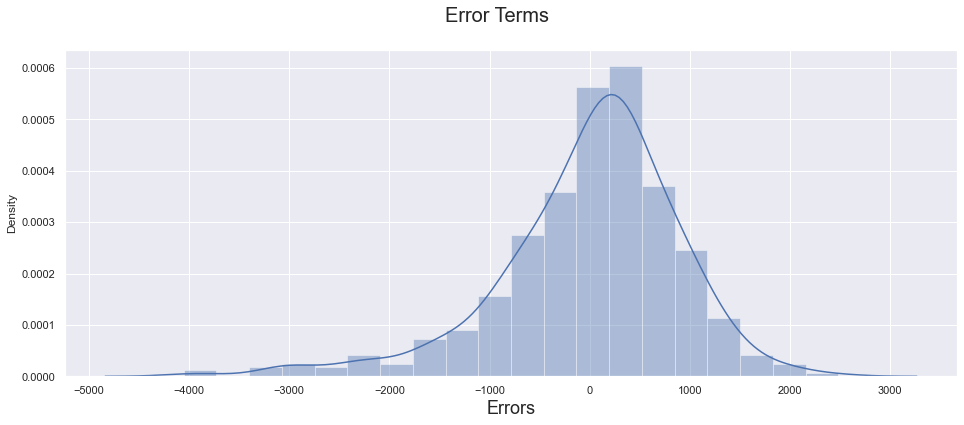

In [40]:
## calculat the error terms which basically between the expected values at a particular time
# and the valyes that was actually observed at various stages .
y_train_pred = lr6.predict(X_train[cols6])

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)

### <font color=#0f3fd1 >6.3 Making Predictions and Evaluate the data<font> 

In [41]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.779661683196365

In [42]:
#final model creation 
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
          'weathersit_moderate','temp']
X_train_rfe = X_train[cols5]
# Create a sixth fitted model
lr6 = sm.OLS(y_train, X_train_rfe).fit()
print(lr6.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1225.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:24:20   Log-Likelihood:                         -4199.1
No. Observations:                 511   AIC:                                      8422.
Df Residuals:                     499   BIC:                                      8473.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

## <font color=brown>7. Conclusion<font>
Significant variables to predict the demand for shared bikes

1. holiday
2. temp
3. hum
4. windspeed
5. Season
6. months(January, July, September, November, December)
7. Year
8. Sunday
9. weathersit( Light Snow, Mist + Cloud